Tasks:

1. Identify the top 10 most sold products by quantity.
2. Find the products with the highest revenue (Quantity * Price).

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1= pd.read_excel("C:/Users/prash/Desktop/data/online_retail_II.xlsx", sheet_name='Year 2009-2010')
df2= pd.read_excel('C:/Users/prash/Desktop/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = pd.concat([df1, df2], ignore_index=True)

# Data Cleaning- negative values to positive values
df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()

# Adding revenue column
df['TotalPrice'] = df['Quantity'] * df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


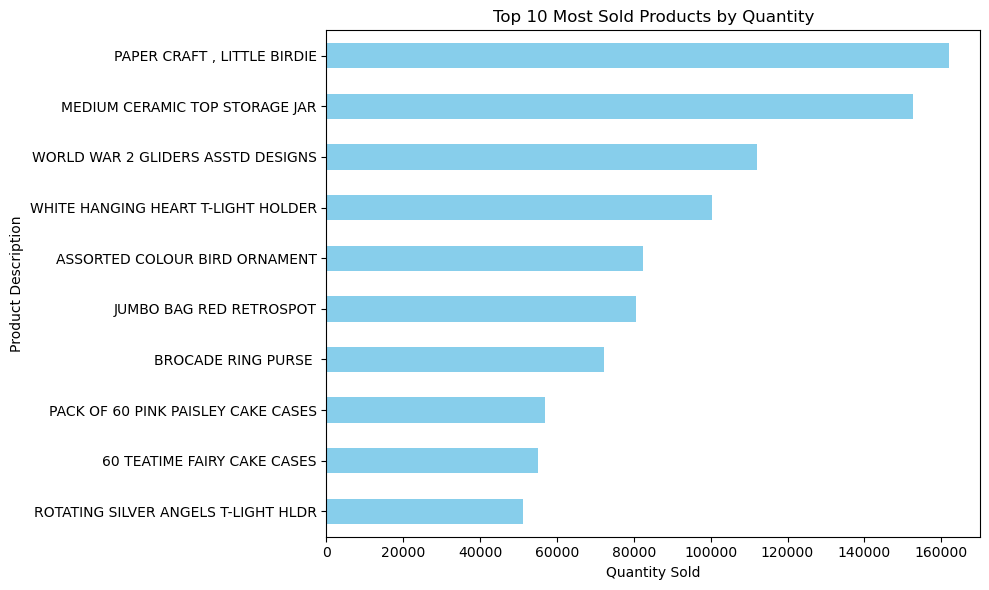

In [16]:
# Top 10 most sold products by quantity
df.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10).reset_index().plot(x='Description', y='Quantity', kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Sold Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

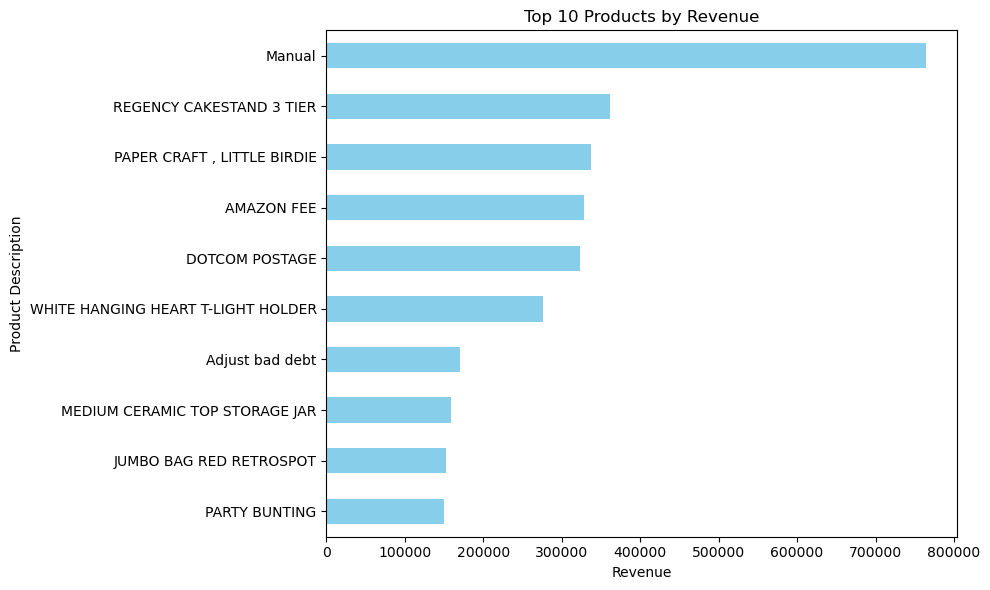

In [17]:
# Top 10 products by revenue
df.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10).reset_index().plot(x='Description', y='TotalPrice', kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [22]:
scanlist=['Manual','AMAZON FEE','DOTCOM POSTAGE','Adjust bad debt', 'POSTAGE']

df[df['Description'].isin(scanlist)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France,54.00
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA,141.00
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium,130.00
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany,108.00
927,C489538,POST,POSTAGE,1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom,9.58
...,...,...,...,...,...,...,...,...,...
1066677,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,36.00
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,18.00
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,36.00
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,54.00


Seems like the above is bad data and not related to online retail sale. So, i will remove from main data

In [23]:
df= df[~df['Description'].isin(scanlist)]

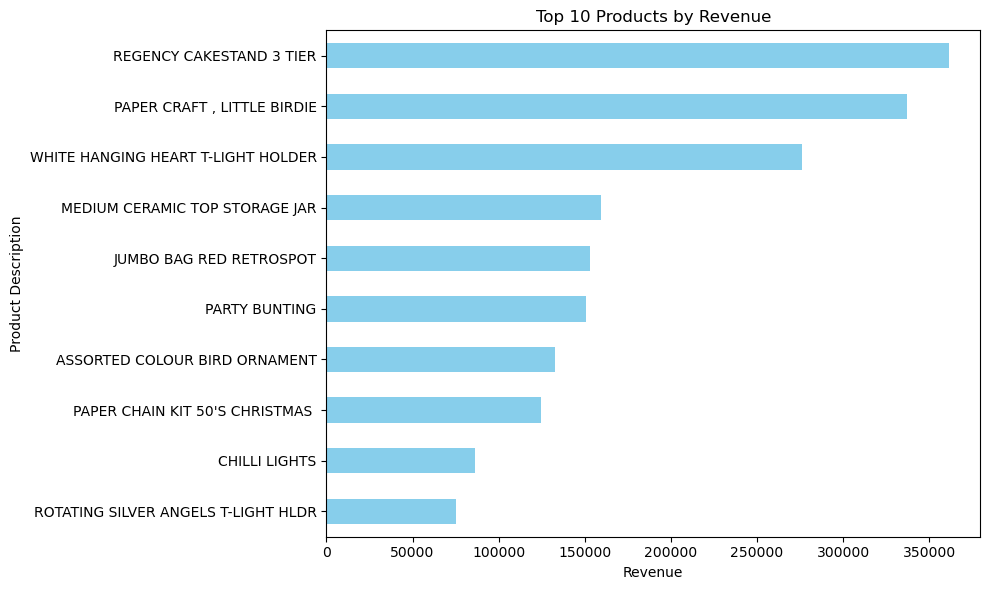

In [24]:
# Top 10 products by revenue
df.groupby('Description').agg({'TotalPrice': 'sum'}).sort_values(by='TotalPrice', ascending=False).head(10).reset_index().plot(x='Description', y='TotalPrice', kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()